In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [33]:
politifact_fake_tweet_times = pd.read_csv('processed-data/tweet_times/politifact_fake_tweet_times.csv')
politifact_real_tweet_times = pd.read_csv('processed-data/tweet_times/politifact_real_tweet_times.csv')

/Users/vangelistrikoupis/miniforge3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### We'll convert the timestamp fetched from twitter to a numpy `datetime` that we can process

In [34]:
politifact_fake_tweet_times['created_at'] = pd.to_datetime(politifact_fake_tweet_times['created_at'], errors='coerce').apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S')if not pd.isnull(x) else '')
politifact_fake_tweet_times['created_at'] = politifact_fake_tweet_times['created_at'].astype('datetime64[s]') 

politifact_real_tweet_times['created_at'] = pd.to_datetime(politifact_real_tweet_times['created_at'], errors='coerce').apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S')if not pd.isnull(x) else '')
politifact_real_tweet_times['created_at'] = politifact_real_tweet_times['created_at'].astype('datetime64[s]') 

### Our `created_at` column is now accurate to the second

In [28]:
politifact_fake_tweet_times.head()

,Unnamed: 0,created_at,text,author_id,id,news_id,withheld
0,0,2017-10-03 15:48:10,"Oh, Gays for Trump. Calling on Gays for Trump!...",42013288,9.152421e+17,politifact15371,NaN
1,1,2017-10-03 16:19:10,FYI Trump admin voted FOR death penalty for ga...,250756569,9.152499e+17,politifact15371,NaN
2,2,2017-10-03 21:06:58,BREAKING: Trump Votes For Death Penalty For Be...,331377273,9.153223e+17,politifact15371,NaN
3,3,2017-10-03 21:08:33,BREAKING: Trump Votes For Death Penalty For Be...,67899097,9.153227e+17,politifact15371,NaN
4,4,2017-10-03 21:10:28,BREAKING: Trump Votes For Death Penalty For Be...,178595022,9.153232e+17,politifact15371,NaN


In [35]:
politifact_fake_tweet_groups = {}
for name, group in politifact_fake_tweet_times.groupby('news_id'):
    politifact_fake_tweet_groups['group_' + str(name)] = group

In [36]:
politifact_real_tweet_groups = {}
for name, group in politifact_real_tweet_times.groupby('news_id'):
    politifact_real_tweet_groups['group_' + str(name)] = group

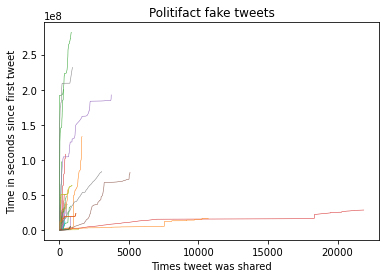

In [37]:
fig, ax = plt.subplots()
plt.rcParams['lines.linewidth'] = 0.5
max_times_shared = 0
for item in politifact_fake_tweet_groups:
    if len(politifact_fake_tweet_groups[item]) > max_times_shared:
        max_times_shared = len(politifact_fake_tweet_groups[item])
for item in politifact_fake_tweet_groups:
    politifact_fake_tweet_groups[item]['deltaT'] = politifact_fake_tweet_groups[item].created_at.diff().astype('timedelta64[s]', errors='raise')
    politifact_fake_tweet_groups[item].fillna(0, inplace=True)
    x = np.arange(0, len(politifact_fake_tweet_groups[item]))
    cumulative = np.cumsum(politifact_fake_tweet_groups[item]['deltaT'])
    ax.plot(x, cumulative)
    ax.set_xlabel('Times tweet was shared')
    ax.set_ylabel('Time in seconds since first tweet')
    ax.set_title('Politifact fake tweets')
plt.show()

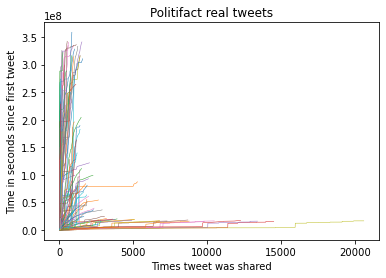

In [39]:
fig, ax = plt.subplots()
plt.rcParams['lines.linewidth'] = 0.5
max_times_shared = 0
for item in politifact_real_tweet_groups:
    if len(politifact_real_tweet_groups[item]) > max_times_shared:
        max_times_shared = len(politifact_real_tweet_groups[item])
for item in politifact_real_tweet_groups:
    politifact_real_tweet_groups[item]['deltaT'] = politifact_real_tweet_groups[item].created_at.diff().astype('timedelta64[s]', errors='raise')
    politifact_real_tweet_groups[item].fillna(0, inplace=True)
    x = np.arange(0, len(politifact_real_tweet_groups[item]))
    cumulative = np.cumsum(politifact_real_tweet_groups[item]['deltaT'])
    ax.plot(x, cumulative)
    ax.set_xlabel('Times tweet was shared')
    ax.set_ylabel('Time in seconds since first tweet')
    ax.set_title('Politifact real tweets')
plt.show()

In [40]:
dfs_to_plot = list(politifact_fake_tweet_groups.keys())

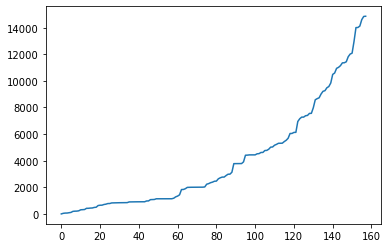

In [20]:
fig, ax = plt.subplots()
exp = lambda x: 10**(x)
log = lambda x: np.log(x)
x = np.arange(0, len(politifact_fake_tweet_groups[dfs_to_plot[0]]))
cumulative = np.cumsum(politifact_fake_tweet_groups[dfs_to_plot[0]]['deltaT'])
ax.plot(x, cumulative)
plt.show()
   